# <font style="color:rgb(50,120,229)">Application: Sunglass Filter </font>

Lets create a simple application using some of the tools we have seen so far.

We will put a sunglass on the face of elon musk and make him look cooler.

![](https://www.dropbox.com/s/4w87z3mkr75lpa0/musk_with_sunglass.png?dl=1)

In [5]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

## <font style="color:rgb(50,120,229)">Load the Face and sunglass Images </font>
Firstly wee need the two images:
1. Imag of Elon Musk
1. A png image of a sunglass with an alpha channel


glassPNG image Dimension =(100, 300, 4)


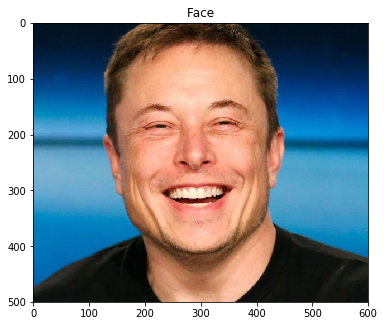

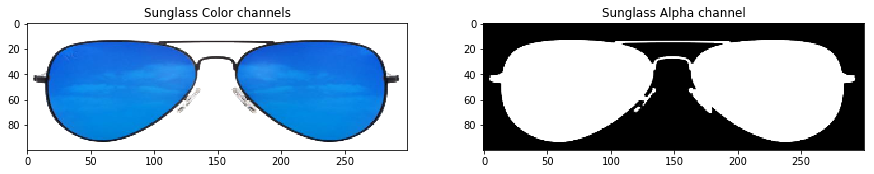

In [11]:
# Load the Face Image
faceImagePath = "DATA/musk.jpg"
faceImage = cv2.imread(faceImagePath)

plt.imshow(faceImage[:,:,::-1]);plt.title("Face")

# Load the Sunglass image with Alpha channel from (http://pluspng.com)
glassimagePath = "DATA/sunglass.png"
glassPNG = cv2.imread(glassimagePath,-1)

# Resize the image to fit over the eye region
glassPNG = cv2.resize(glassPNG,(300,100))
print("glassPNG image Dimension ={}".format(glassPNG.shape))

# Separate the Color and alpha channels
glassBGR = glassPNG[:,:,0:3]
glassMask1 = glassPNG[:,:,3]

# Display the images for clarity
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title('Sunglass Color channels');
plt.subplot(122);plt.imshow(glassMask1,cmap='gray');plt.title('Sunglass Alpha channel');

## <font style="color:rgb(50,120,229)">Find the eye region </font>
From the face image, we can see that the eye region lies approximately from row #150 to row #250 and col #140 to col #440. Thus, this will be region where the sunglass is to be placed.

## <font style="color:rgb(50,120,229)">Using Naive Replace</font>
The easiest way that might have come to your mind would be to just replace the eye region with that of the sunglass. Let us give it a try.

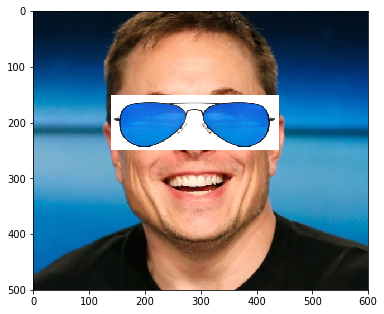

In [8]:
# Make a copy
faceWithGlassesNaive = faceImage.copy()

# Replace the eye region with the sunglass image
faceWithGlassesNaive[150:250,140:440]=glassBGR

plt.imshow(faceWithGlassesNaive[...,::-1])

You can see that the output is not even close. This is because the BGR image is opaque and will either have a black or white rectangle around the sunglass. 

We need to use a mask along with the sunglass image in order to get the desired output. Let us see how it can be done with very simple steps using the tools we have learned till now.

## <font style="color:rgb(50,120,229)">Using Arithmetic Operations and Alpha Mask</font>
In order to put the sunglass on top of the eye region, we need to follow these steps:

1. Create a binary mask with 3-channels using the single channel mask.
1. Extract the eye region from the face image
1. Multiply the Mask with the sunglass to get the masked sunglass
1. Multiply the negative of Mask with the eye region to create a hole in the eye region for the sunglass to be placed.
1. Add the masked sunglass and eye regions to get the combined eye region with the sunglass.
1. Replace the eye region in the original image with that of the output we got in the previous step. This is the final output


Text(0.5,1,'Augmented Eye and Sunglass')

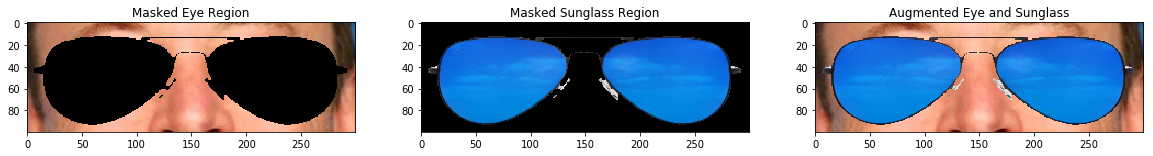

In [12]:
# Since Face Image is a 3-channel image, we create a 3 channel image for the mask
glassMask = cv2.merge((glassMask1,glassMask1,glassMask1))

# Make the values [0,1] since we are using arithmetic operations
glassMask = np.uint8(glassMask/255)

# Make a copy
faceWithGlassesArithmetic = faceImage.copy()

# Get the eye region from the face image
eyeROI= faceWithGlassesArithmetic[150:250,140:440]

# Use the mask to create the masked eye region
maskedEye = cv2.multiply(eyeROI,(1-glassMask))

# Use the mask to create the masked sunglass region
maskedGlass = cv2.multiply(glassBGR,glassMask)

# Combine the Sunglass in the Eye Region to get the augmented image
eyeRoiFinal = cv2.add(maskedEye, maskedGlass)

# Display the intermediate results
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(maskedEye[...,::-1]);plt.title("Masked Eye Region")
plt.subplot(132);plt.imshow(maskedGlass[...,::-1]);plt.title("Masked Sunglass Region")
plt.subplot(133);plt.imshow(eyeRoiFinal[...,::-1]);plt.title("Augmented Eye and Sunglass")

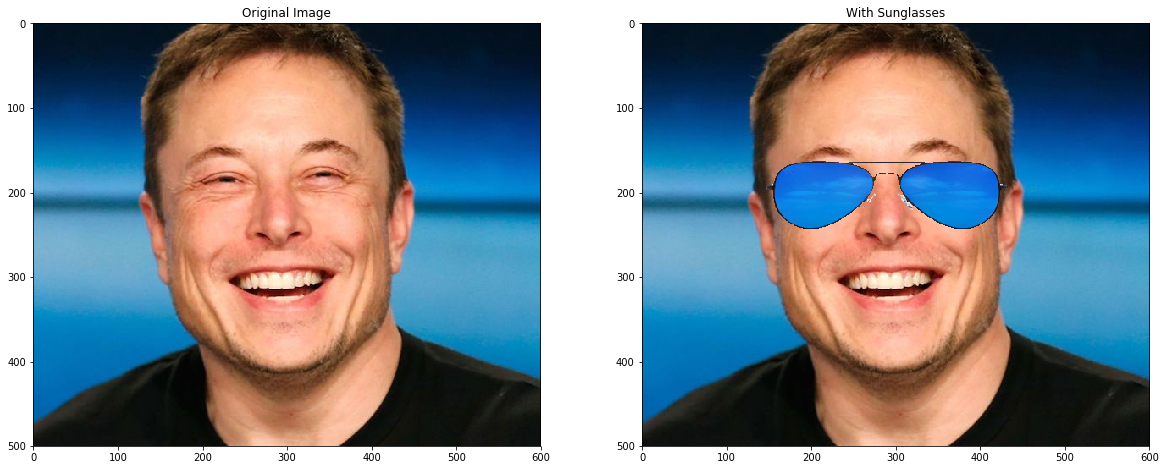

In [10]:
# Replace the eye ROI with the output from the previous section
faceWithGlassesArithmetic[150:250,140:440]=eyeRoiFinal

# Display the final result
plt.figure(figsize=[20,20]);
plt.subplot(121);plt.imshow(faceImage[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(faceWithGlassesArithmetic[:,:,::-1]);plt.title("With Sunglasses");

Same logic applies to create other filters like ear-rings, mustache, hat etc.